In [ ]:
# Gerekli kütüphaneleri içe aktarma
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Türkçe karakterler için font ayarı
plt.rcParams['font.family'] = 'DejaVu Sans'

# Veriyi yükleme
df = pd.read_csv("anket.csv")
print("Veri Seti Boyutu:", df.shape)
print("\nİlk 5 Satır:")
df.head()



Veri Seti Boyutu: (257, 12)

İlk 5 Satır:


,Zaman damgası,Yaşınız?,Cinsiyetiniz?,Günlük iş/okul yoğunluğu?,Günde ortalama kaç fincan kahve içiyorsunuz?,Kahve içme zamanı (Birden fazla seçilebilir),Kahve içtiğinizde kendinizi nasıl hissediyorsunuz?,Günlük stres düzeyinizi nasıl değerlendirirsiniz?,Ortalama günlük uyku süreniz (saat),Günün genel ruh halinizi nasıl tanımlarsınız?,Stresli hissettiğinizde daha fazla kahve içme eğiliminde misiniz?,Kahve içme nedeni?
0,08.11.2025 16:30:06,18-24,Erkek,Yüksek,1-2,Akşam,Hiç Rahatlamış Hissetmem,Düşük/Orta Stres,8-9,Enerjik,Hayır,Tadı vs.
1,08.11.2025 16:31:43,18-24,Erkek,Çok Yüksek,1-2,Akşam,Orta Düzeyde Rahatlamış Hissederim,Düşük/Orta Stres,8-9,Sakin,Emin değilim,Tadı vs.
2,08.11.2025 21:49:48,35-44,Erkek,Yüksek,1-2,Sabah,Az Rahatlamış Hissederim,Yüksek Stres,6-7,Stresli,Hayır,Alışkanlık
3,08.11.2025 21:51:19,18-24,Erkek,Orta,1-2,Akşam,Orta Düzeyde Rahatlamış Hissederim,Yüksek Stres,6-7,Yorgun,Hayır,Uyanmak
4,08.11.2025 21:51:25,18-24,Erkek,Orta,0,Öğle,Orta Düzeyde Rahatlamış Hissederim,Düşük/Orta Stres,6-7,Enerjik,Emin değilim,Tadı vs.


In [2]:
# Sütun isimlerini kontrol etme ve düzenleme
print("Sütun İsimleri:")
print(df.columns.tolist())

# Sütun isimlerini temizleme (boşlukları kaldırma)
df.columns = df.columns.str.strip()

# Veri hakkında genel bilgi
print("\n\nVeri Seti Bilgileri:")
df.info()


Sütun İsimleri:
['Zaman damgası', 'Yaşınız?', 'Cinsiyetiniz?', 'Günlük iş/okul yoğunluğu?', 'Günde ortalama kaç fincan kahve içiyorsunuz?  ', 'Kahve içme zamanı (Birden fazla seçilebilir)  ', 'Kahve içtiğinizde kendinizi nasıl hissediyorsunuz?  ', 'Günlük stres düzeyinizi nasıl değerlendirirsiniz?  ', 'Ortalama günlük uyku süreniz (saat)  ', 'Günün genel ruh halinizi nasıl tanımlarsınız?  ', 'Stresli hissettiğinizde daha fazla kahve içme eğiliminde misiniz?  ', 'Kahve içme nedeni? ']


Veri Seti Bilgileri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 12 columns):
 #   Column                                                             Non-Null Count  Dtype 
---  ------                                                             --------------  ----- 
 0   Zaman damgası                                                      257 non-null    object
 1   Yaşınız?                                                           257 non-null    object
 2 

In [3]:
# Eksik değerleri kontrol etme
print("Eksik Değerler:")
print(df.isnull().sum())

# Temel istatistikler
print("\n\nTemel İstatistikler:")
print(df.describe())


Eksik Değerler:
Zaman damgası                                                        0
Yaşınız?                                                             0
Cinsiyetiniz?                                                        0
Günlük iş/okul yoğunluğu?                                            0
Günde ortalama kaç fincan kahve içiyorsunuz?                         0
Kahve içme zamanı (Birden fazla seçilebilir)                         0
Kahve içtiğinizde kendinizi nasıl hissediyorsunuz?                   0
Günlük stres düzeyinizi nasıl değerlendirirsiniz?                    0
Ortalama günlük uyku süreniz (saat)                                  0
Günün genel ruh halinizi nasıl tanımlarsınız?                        0
Stresli hissettiğinizde daha fazla kahve içme eğiliminde misiniz?    0
Kahve içme nedeni?                                                   0
dtype: int64


Temel İstatistikler:
              Zaman damgası Yaşınız? Cinsiyetiniz? Günlük iş/okul yoğunluğu?  \
count           

## 1. VERİ ÖN İŞLEME (Data Preprocessing)


In [4]:
# Analiz için kullanacağımız sütunları seçelim
# Zaman damgasını çıkaralım, çünkü makine öğrenmesi için gerekli değil
df_clean = df.drop('Zaman damgası', axis=1)

# Sütun isimlerini kısaltma (daha kolay kullanım için)
df_clean.columns = [
    'Yas',
    'Cinsiyet',
    'Is_Yogunlugu',
    'Kahve_Miktar',
    'Kahve_Zamani',
    'Kahve_Hissi',
    'Stres_Duzeyi',
    'Uyku_Suresi',
    'Ruh_Hali',
    'Stresli_Kahve',
    'Kahve_Nedeni'
]

print("Temizlenmiş Veri Seti:")
print(df_clean.head())
print("\nVeri Seti Şekli:", df_clean.shape)


Temizlenmiş Veri Seti:
     Yas Cinsiyet Is_Yogunlugu Kahve_Miktar Kahve_Zamani  \
0  18-24    Erkek       Yüksek          1-2        Akşam   
1  18-24    Erkek   Çok Yüksek          1-2        Akşam   
2  35-44    Erkek       Yüksek          1-2        Sabah   
3  18-24    Erkek         Orta          1-2        Akşam   
4  18-24    Erkek         Orta            0         Öğle   

                          Kahve_Hissi      Stres_Duzeyi Uyku_Suresi Ruh_Hali  \
0            Hiç Rahatlamış Hissetmem  Düşük/Orta Stres         8-9  Enerjik   
1  Orta Düzeyde Rahatlamış Hissederim  Düşük/Orta Stres         8-9    Sakin   
2            Az Rahatlamış Hissederim      Yüksek Stres         6-7  Stresli   
3  Orta Düzeyde Rahatlamış Hissederim      Yüksek Stres         6-7   Yorgun   
4  Orta Düzeyde Rahatlamış Hissederim  Düşük/Orta Stres         6-7  Enerjik   

  Stresli_Kahve Kahve_Nedeni  
0         Hayır     Tadı vs.  
1  Emin değilim     Tadı vs.  
2         Hayır   Alışkanlık  
3         H

In [5]:
# Kategorik değişkenlerin benzersiz değerlerini kontrol etme
print("Kategorik Değişkenler ve Benzersiz Değerleri:\n")
for col in df_clean.columns:
    print(f"{col}:")
    print(df_clean[col].value_counts())
    print("\n" + "="*50 + "\n")


Kategorik Değişkenler ve Benzersiz Değerleri:

Yas:
Yas
18-24    188
25-34     33
35-44     21
44+       15
Name: count, dtype: int64


Cinsiyet:
Cinsiyet
Kadın    138
Erkek    119
Name: count, dtype: int64


Is_Yogunlugu:
Is_Yogunlugu
Orta          104
Yüksek         88
Çok Yüksek     35
Düşük          30
Name: count, dtype: int64


Kahve_Miktar:
Kahve_Miktar
1-2    173
0       41
3-4     35
5+       8
Name: count, dtype: int64


Kahve_Zamani:
Kahve_Zamani
Akşam                           60
Öğle                            45
Öğle, Akşam                     39
Gün boyu                        36
Sabah, Öğle                     26
Sabah                           17
Sabah, Öğle, Akşam              15
Sabah, Akşam                    11
Sabah, Öğle, Akşam, Gün boyu     5
Sabah, Öğle, Gün boyu            2
Akşam, Gün boyu                  1
Name: count, dtype: int64


Kahve_Hissi:
Kahve_Hissi
Orta Düzeyde Rahatlamış Hissederim                                                                  

## 2. KEŞİFSEL VERİ ANALİZİ (Exploratory Data Analysis - EDA)


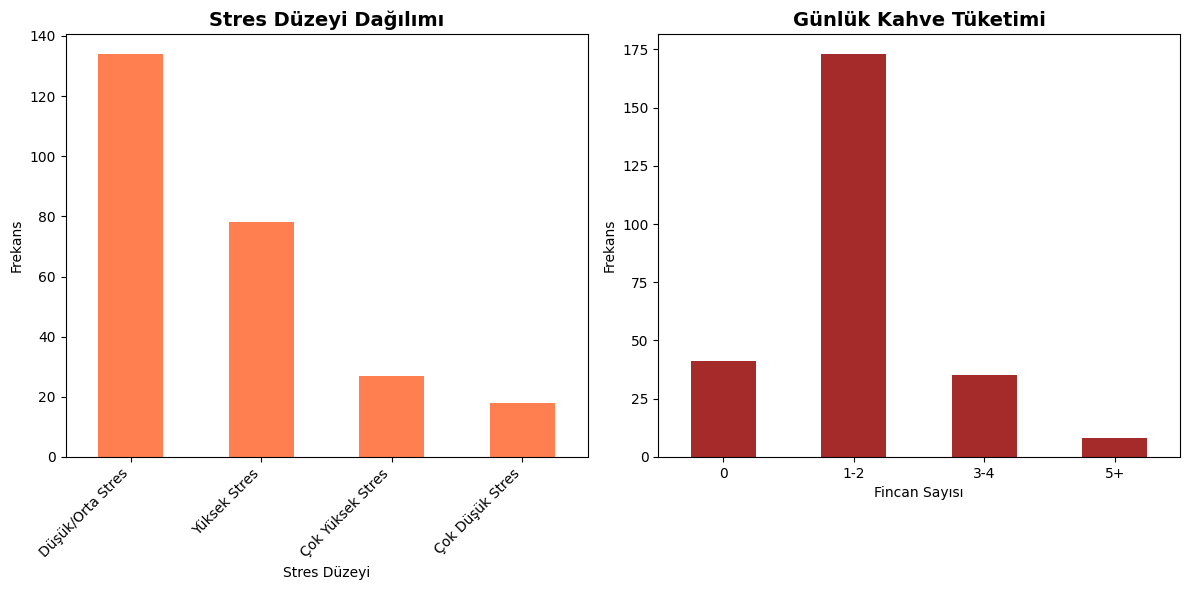

In [6]:
# Stres düzeylerinin dağılımı
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
df_clean['Stres_Duzeyi'].value_counts().plot(kind='bar', color='coral')
plt.title('Stres Düzeyi Dağılımı', fontsize=14, fontweight='bold')
plt.xlabel('Stres Düzeyi')
plt.ylabel('Frekans')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
df_clean['Kahve_Miktar'].value_counts().sort_index().plot(kind='bar', color='brown')
plt.title('Günlük Kahve Tüketimi', fontsize=14, fontweight='bold')
plt.xlabel('Fincan Sayısı')
plt.ylabel('Frekans')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


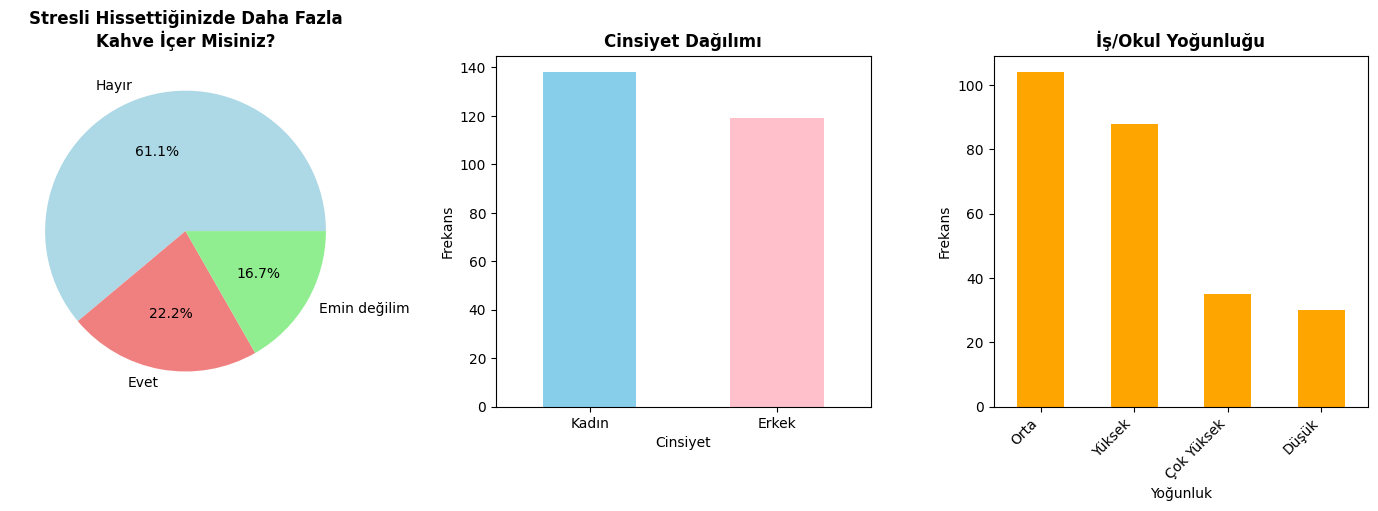

In [7]:
# Stresli olunca daha fazla kahve içme eğilimi analizi
plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
df_clean['Stresli_Kahve'].value_counts().plot(kind='pie', autopct='%1.1f%%', 
                                               colors=['lightblue', 'lightcoral', 'lightgreen'])
plt.title('Stresli Hissettiğinizde Daha Fazla\nKahve İçer Misiniz?', fontsize=12, fontweight='bold')
plt.ylabel('')

plt.subplot(1, 3, 2)
df_clean['Cinsiyet'].value_counts().plot(kind='bar', color=['skyblue', 'pink'])
plt.title('Cinsiyet Dağılımı', fontsize=12, fontweight='bold')
plt.xlabel('Cinsiyet')
plt.ylabel('Frekans')
plt.xticks(rotation=0)

plt.subplot(1, 3, 3)
df_clean['Is_Yogunlugu'].value_counts().plot(kind='bar', color='orange')
plt.title('İş/Okul Yoğunluğu', fontsize=12, fontweight='bold')
plt.xlabel('Yoğunluk')
plt.ylabel('Frekans')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

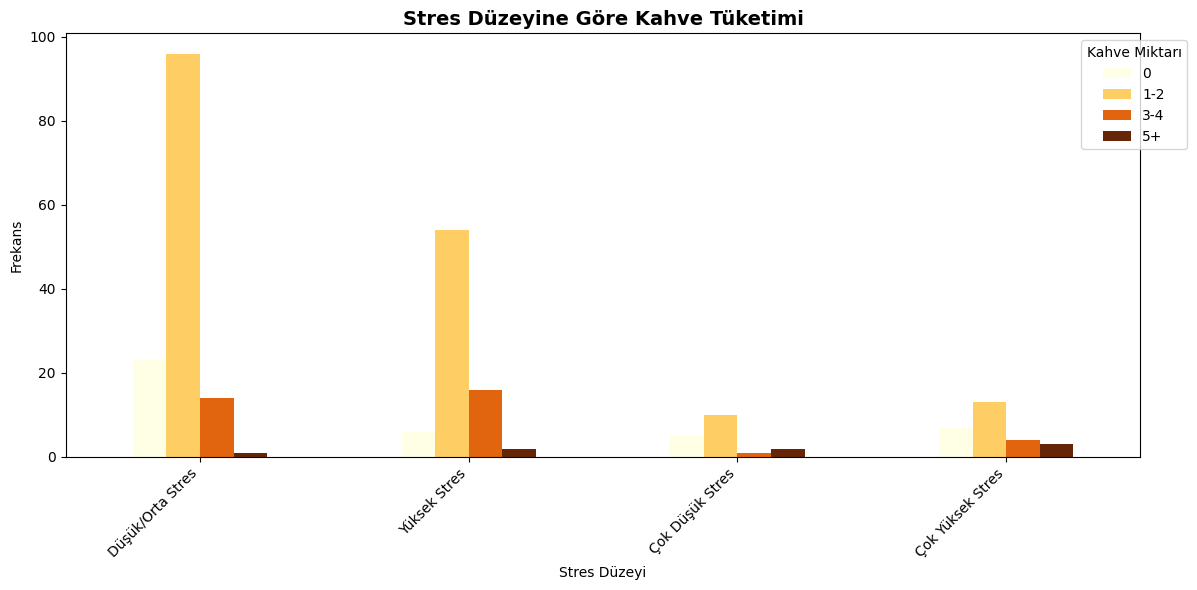

In [8]:
# Stres düzeyi ve kahve tüketimi arasındaki ilişki
plt.figure(figsize=(12, 6))

# Stres düzeyine göre kahve tüketimi
stres_kahve = pd.crosstab(df_clean['Stres_Duzeyi'], df_clean['Kahve_Miktar'])
stres_kahve.plot(kind='bar', figsize=(12, 6), colormap='YlOrBr')
plt.title('Stres Düzeyine Göre Kahve Tüketimi', fontsize=14, fontweight='bold')
plt.xlabel('Stres Düzeyi')
plt.ylabel('Frekans')
plt.legend(title='Kahve Miktarı', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


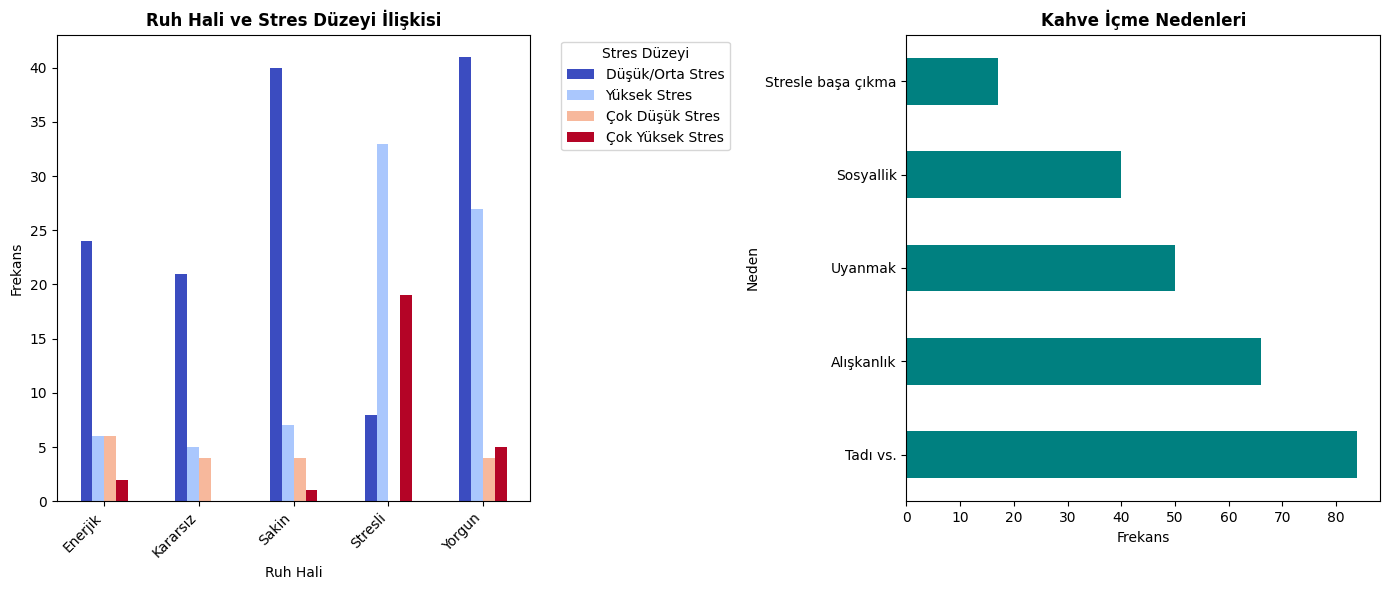

In [9]:
# Ruh hali ve stres ilişkisi
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
ruh_stres = pd.crosstab(df_clean['Ruh_Hali'], df_clean['Stres_Duzeyi'])
ruh_stres.plot(kind='bar', ax=plt.gca(), colormap='coolwarm')
plt.title('Ruh Hali ve Stres Düzeyi İlişkisi', fontsize=12, fontweight='bold')
plt.xlabel('Ruh Hali')
plt.ylabel('Frekans')
plt.legend(title='Stres Düzeyi', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
df_clean['Kahve_Nedeni'].value_counts().plot(kind='barh', color='teal')
plt.title('Kahve İçme Nedenleri', fontsize=12, fontweight='bold')
plt.xlabel('Frekans')
plt.ylabel('Neden')

plt.tight_layout()
plt.show()


## 3. MAKİNE ÖĞRENMESİ MODELLERİ İÇİN VERİ HAZIRLAMA


In [10]:
# Hedef değişken olarak "Stresli_Kahve" kullanacağız
# Bu, stresli hissedildiğinde daha fazla kahve içme eğilimini gösterir
# Evet/Hayır/Emin değilim şeklinde kategorik bir değişken

# Çoklu yanıtları olan sütunları temizleme (virgülle ayrılmış değerler)
# Şimdilik en basit haliyle encode edeceğiz

# Veri setinin kopyasını oluşturalım
df_ml = df_clean.copy()

# Çok yanıtlı soruları sadeleştirme (ilk yanıtı alıyoruz)
def simplify_multi_response(value):
    if pd.isna(value):
        return value
    if ',' in str(value):
        return str(value).split(',')[0].strip()
    return str(value)

# Birden fazla seçenek içeren sütunlara uygulama
df_ml['Kahve_Zamani'] = df_ml['Kahve_Zamani'].apply(simplify_multi_response)
df_ml['Kahve_Hissi'] = df_ml['Kahve_Hissi'].apply(simplify_multi_response)
df_ml['Uyku_Suresi'] = df_ml['Uyku_Suresi'].apply(simplify_multi_response)
df_ml['Ruh_Hali'] = df_ml['Ruh_Hali'].apply(simplify_multi_response)

print("Veri hazırlama tamamlandı!")
print(f"Veri seti boyutu: {df_ml.shape}")
print("\nHedef değişken dağılımı (Stresli_Kahve):")
print(df_ml['Stresli_Kahve'].value_counts())


Veri hazırlama tamamlandı!
Veri seti boyutu: (257, 11)

Hedef değişken dağılımı (Stresli_Kahve):
Stresli_Kahve
Hayır           157
Evet             57
Emin değilim     43
Name: count, dtype: int64


In [11]:
# Tüm kategorik değişkenleri sayısal değerlere dönüştürme (Label Encoding)
le_dict = {}
df_encoded = df_ml.copy()

for column in df_encoded.columns:
    if df_encoded[column].dtype == 'object':
        le = LabelEncoder()
        df_encoded[column] = le.fit_transform(df_encoded[column].astype(str))
        le_dict[column] = le

print("Encode edilmiş veri seti:")
print(df_encoded.head())
print("\nVeri tipleri:")
print(df_encoded.dtypes)


Encode edilmiş veri seti:
   Yas  Cinsiyet  Is_Yogunlugu  Kahve_Miktar  Kahve_Zamani  Kahve_Hissi  \
0    0         0             2             1             0            1   
1    0         0             3             1             0            2   
2    2         0             2             1             2            0   
3    0         0             1             1             0            2   
4    0         0             1             0             3            2   

   Stres_Duzeyi  Uyku_Suresi  Ruh_Hali  Stresli_Kahve  Kahve_Nedeni  
0             0            3         0              2             3  
1             0            3         2              0             3  
2             1            2         3              2             0  
3             1            2         4              2             4  
4             0            2         0              0             3  

Veri tipleri:
Yas              int64
Cinsiyet         int64
Is_Yogunlugu     int64
Kahve_Miktar     in

In [12]:
# Özellikler (X) ve hedef değişken (y) ayırma
X = df_encoded.drop('Stresli_Kahve', axis=1)
y = df_encoded['Stresli_Kahve']

print("Özellik matrisi (X) boyutu:", X.shape)
print("Hedef değişken (y) boyutu:", y.shape)

# Eğitim ve test setlerine ayırma (%80 eğitim, %20 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nEğitim seti boyutu: {X_train.shape}")
print(f"Test seti boyutu: {X_test.shape}")


Özellik matrisi (X) boyutu: (257, 10)
Hedef değişken (y) boyutu: (257,)

Eğitim seti boyutu: (205, 10)
Test seti boyutu: (52, 10)


## 4. MODEL 1: K-NEAREST NEIGHBORS (KNN)


K-NEAREST NEIGHBORS (KNN) MODELİ

En iyi k değeri: 19
En iyi cross-validation skoru: 0.6390


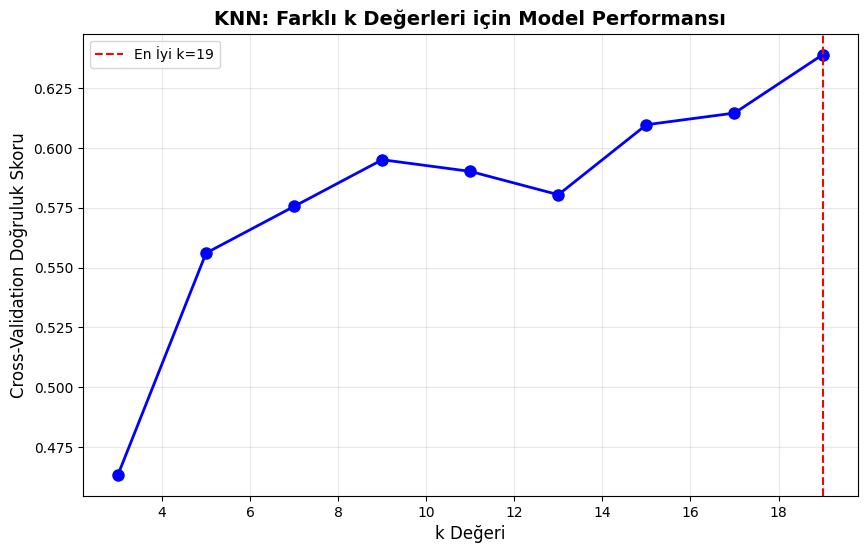

In [13]:
# KNN modelini oluşturma ve eğitme
print("="*60)
print("K-NEAREST NEIGHBORS (KNN) MODELİ")
print("="*60)

# En iyi k değerini bulmak için farklı k değerlerini deneyelim
k_values = range(3, 21, 2)
k_scores = []

for k in k_values:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_temp, X_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

# En iyi k değeri
best_k = k_values[k_scores.index(max(k_scores))]
print(f"\nEn iyi k değeri: {best_k}")
print(f"En iyi cross-validation skoru: {max(k_scores):.4f}")

# Görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(k_values, k_scores, 'bo-', linewidth=2, markersize=8)
plt.xlabel('k Değeri', fontsize=12)
plt.ylabel('Cross-Validation Doğruluk Skoru', fontsize=12)
plt.title('KNN: Farklı k Değerleri için Model Performansı', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.axvline(x=best_k, color='r', linestyle='--', label=f'En İyi k={best_k}')
plt.legend()
plt.show()


In [14]:
# En iyi k değeriyle final modeli oluşturma
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train, y_train)

# Tahmin yapma
y_pred_knn = knn_model.predict(X_test)

# Model performansı
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"\n{'='*60}")
print(f"KNN Model Doğruluk Oranı: {knn_accuracy:.4f} (%{knn_accuracy*100:.2f})")
print(f"{'='*60}")

print("\n📊 Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred_knn, 
                          target_names=le_dict['Stresli_Kahve'].classes_))



KNN Model Doğruluk Oranı: 0.6346 (%63.46)

📊 Sınıflandırma Raporu:
              precision    recall  f1-score   support

Emin değilim       0.00      0.00      0.00         9
        Evet       0.75      0.27      0.40        11
       Hayır       0.65      0.94      0.77        32

    accuracy                           0.63        52
   macro avg       0.47      0.40      0.39        52
weighted avg       0.56      0.63      0.56        52



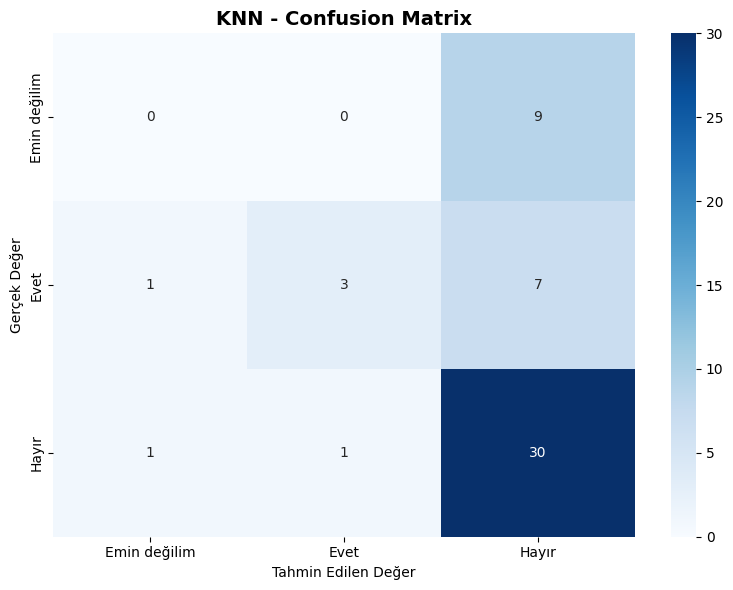

In [15]:
# Confusion Matrix görselleştirme
plt.figure(figsize=(8, 6))
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le_dict['Stresli_Kahve'].classes_,
            yticklabels=le_dict['Stresli_Kahve'].classes_)
plt.title('KNN - Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('Gerçek Değer')
plt.xlabel('Tahmin Edilen Değer')
plt.tight_layout()
plt.show()


## 5. MODEL 2: DECISION TREE (Karar Ağacı)


DECISION TREE (KARAR AĞACI) MODELİ

En iyi max_depth değeri: 2
En iyi cross-validation skoru: 0.6488


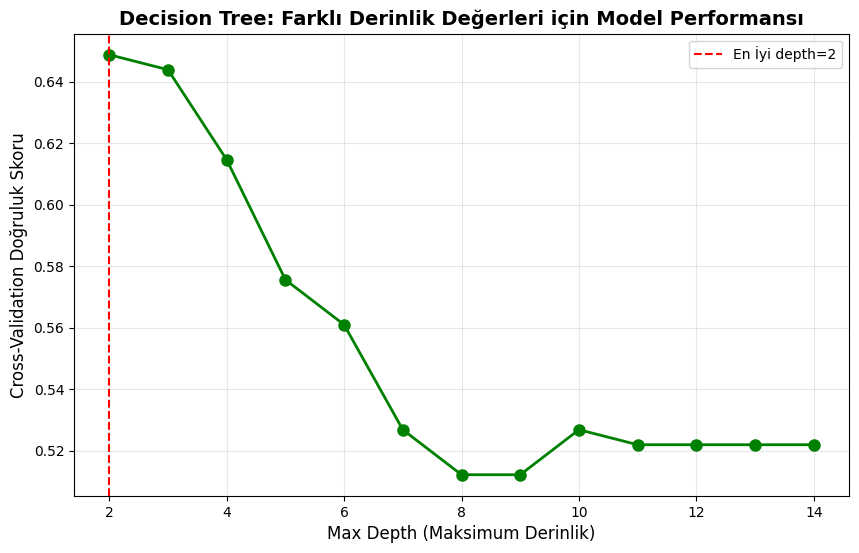

In [16]:
# Decision Tree modelini oluşturma ve eğitme
print("="*60)
print("DECISION TREE (KARAR AĞACI) MODELİ")
print("="*60)

# Farklı max_depth değerlerini test etme
depth_values = range(2, 15)
depth_scores = []

for depth in depth_values:
    dt_temp = DecisionTreeClassifier(max_depth=depth, random_state=42)
    scores = cross_val_score(dt_temp, X_train, y_train, cv=5, scoring='accuracy')
    depth_scores.append(scores.mean())

# En iyi depth değeri
best_depth = depth_values[depth_scores.index(max(depth_scores))]
print(f"\nEn iyi max_depth değeri: {best_depth}")
print(f"En iyi cross-validation skoru: {max(depth_scores):.4f}")

# Görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(depth_values, depth_scores, 'go-', linewidth=2, markersize=8)
plt.xlabel('Max Depth (Maksimum Derinlik)', fontsize=12)
plt.ylabel('Cross-Validation Doğruluk Skoru', fontsize=12)
plt.title('Decision Tree: Farklı Derinlik Değerleri için Model Performansı', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.axvline(x=best_depth, color='r', linestyle='--', label=f'En İyi depth={best_depth}')
plt.legend()
plt.show()


In [30]:
# En iyi depth değeriyle final modeli oluşturma
dt_model = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
dt_model.fit(X_train, y_train)

# Tahmin yapma
y_pred_dt = dt_model.predict(X_test)

# Model performansı
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"\n{'='*60}")
print(f"Decision Tree Model Doğruluk Oranı: {dt_accuracy:.4f} (%{dt_accuracy*100:.2f})")
print(f"{'='*60}")

print("\n📊 Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred_dt, 
                          target_names=le_dict['Stresli_Kahve'].classes_))



Decision Tree Model Doğruluk Oranı: 0.6154 (%61.54)

📊 Sınıflandırma Raporu:
              precision    recall  f1-score   support

Emin değilim       0.00      0.00      0.00         9
        Evet       0.43      0.55      0.48        11
       Hayır       0.68      0.81      0.74        32

    accuracy                           0.62        52
   macro avg       0.37      0.45      0.41        52
weighted avg       0.51      0.62      0.56        52



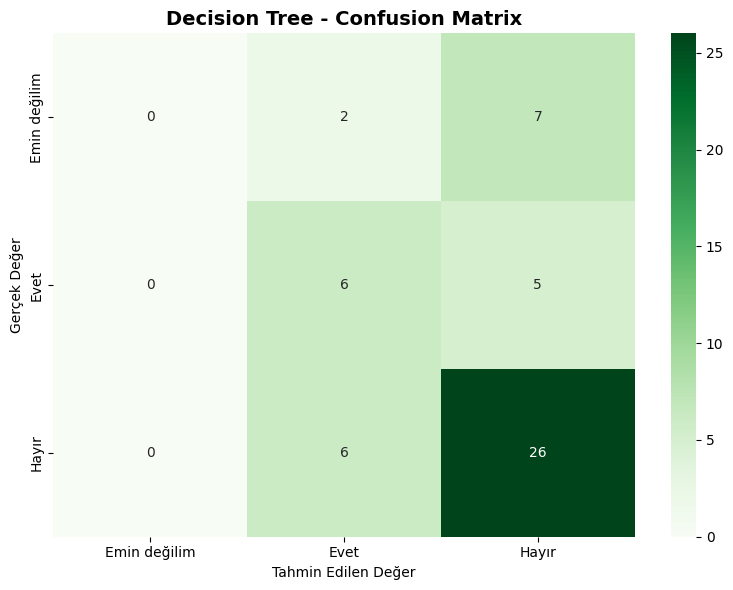

In [18]:
# Confusion Matrix görselleştirme
plt.figure(figsize=(8, 6))
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens', 
            xticklabels=le_dict['Stresli_Kahve'].classes_,
            yticklabels=le_dict['Stresli_Kahve'].classes_)
plt.title('Decision Tree - Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('Gerçek Değer')
plt.xlabel('Tahmin Edilen Değer')
plt.tight_layout()
plt.show()


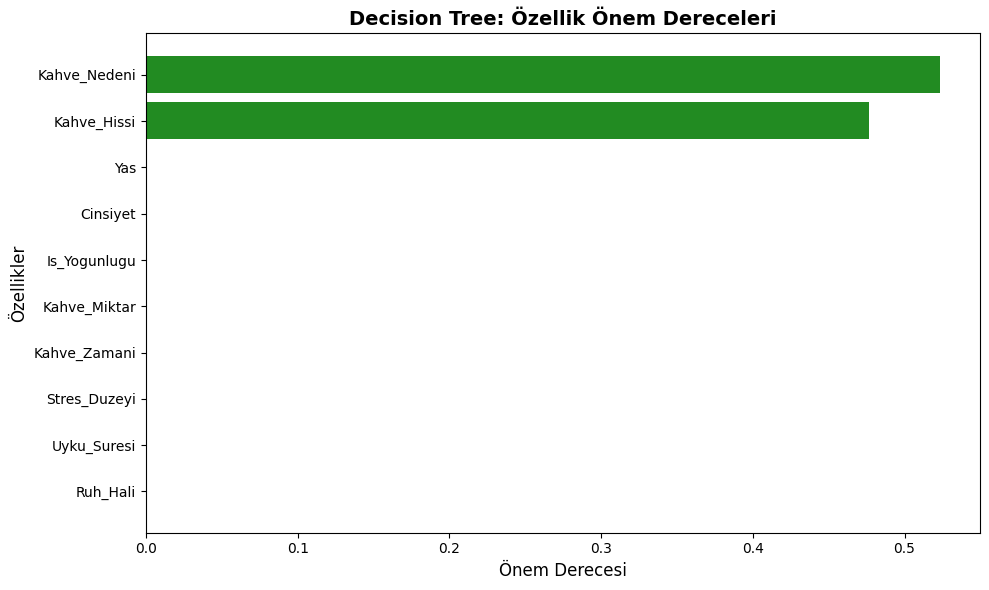


Özellik Önem Dereceleri:
        Ozellik      Onem
9  Kahve_Nedeni  0.523556
5   Kahve_Hissi  0.476444
0           Yas  0.000000
1      Cinsiyet  0.000000
2  Is_Yogunlugu  0.000000
3  Kahve_Miktar  0.000000
4  Kahve_Zamani  0.000000
6  Stres_Duzeyi  0.000000
7   Uyku_Suresi  0.000000
8      Ruh_Hali  0.000000


In [19]:
# Feature Importance (Özellik Önem Dereceleri)
feature_importance = pd.DataFrame({
    'Ozellik': X.columns,
    'Onem': dt_model.feature_importances_
}).sort_values('Onem', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Ozellik'], feature_importance['Onem'], color='forestgreen')
plt.xlabel('Önem Derecesi', fontsize=12)
plt.ylabel('Özellikler', fontsize=12)
plt.title('Decision Tree: Özellik Önem Dereceleri', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nÖzellik Önem Dereceleri:")
print(feature_importance)


## 6. MODEL 3: RANDOM FOREST (Rastgele Orman)


RANDOM FOREST (RASTGELE ORMAN) MODELİ
n_estimators=10: 0.6146
n_estimators=25: 0.6293
n_estimators=50: 0.6146
n_estimators=75: 0.6341
n_estimators=100: 0.6244
n_estimators=150: 0.6341
n_estimators=200: 0.6341

En iyi n_estimators değeri: 75
En iyi cross-validation skoru: 0.6341


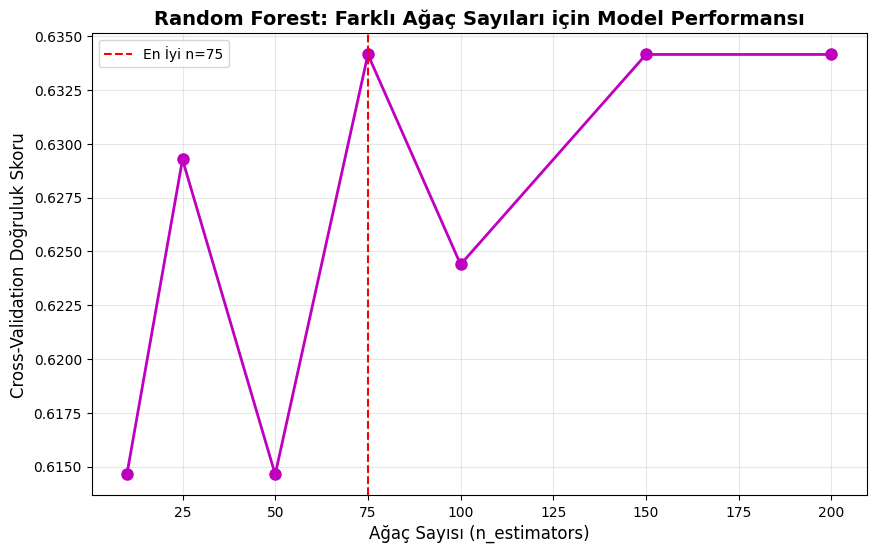

In [20]:
# Random Forest modelini oluşturma ve eğitme
print("="*60)
print("RANDOM FOREST (RASTGELE ORMAN) MODELİ")
print("="*60)

# Farklı n_estimators (ağaç sayısı) değerlerini test etme
n_estimators_values = [10, 25, 50, 75, 100, 150, 200]
rf_scores = []

for n_est in n_estimators_values:
    rf_temp = RandomForestClassifier(n_estimators=n_est, random_state=42, max_depth=best_depth)
    scores = cross_val_score(rf_temp, X_train, y_train, cv=5, scoring='accuracy')
    rf_scores.append(scores.mean())
    print(f"n_estimators={n_est}: {scores.mean():.4f}")

# En iyi n_estimators değeri
best_n_estimators = n_estimators_values[rf_scores.index(max(rf_scores))]
print(f"\nEn iyi n_estimators değeri: {best_n_estimators}")
print(f"En iyi cross-validation skoru: {max(rf_scores):.4f}")

# Görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, rf_scores, 'mo-', linewidth=2, markersize=8)
plt.xlabel('Ağaç Sayısı (n_estimators)', fontsize=12)
plt.ylabel('Cross-Validation Doğruluk Skoru', fontsize=12)
plt.title('Random Forest: Farklı Ağaç Sayıları için Model Performansı', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.axvline(x=best_n_estimators, color='r', linestyle='--', label=f'En İyi n={best_n_estimators}')
plt.legend()
plt.show()


In [21]:
# En iyi parametrelerle final modeli oluşturma
rf_model = RandomForestClassifier(n_estimators=best_n_estimators, random_state=42, max_depth=best_depth)
rf_model.fit(X_train, y_train)

# Tahmin yapma
y_pred_rf = rf_model.predict(X_test)

# Model performansı
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"\n{'='*60}")
print(f"Random Forest Model Doğruluk Oranı: {rf_accuracy:.4f} (%{rf_accuracy*100:.2f})")
print(f"{'='*60}")

print("\n📊 Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred_rf, 
                          target_names=le_dict['Stresli_Kahve'].classes_))



Random Forest Model Doğruluk Oranı: 0.6346 (%63.46)

📊 Sınıflandırma Raporu:
              precision    recall  f1-score   support

Emin değilim       0.00      0.00      0.00         9
        Evet       0.67      0.18      0.29        11
       Hayır       0.63      0.97      0.77        32

    accuracy                           0.63        52
   macro avg       0.43      0.38      0.35        52
weighted avg       0.53      0.63      0.53        52



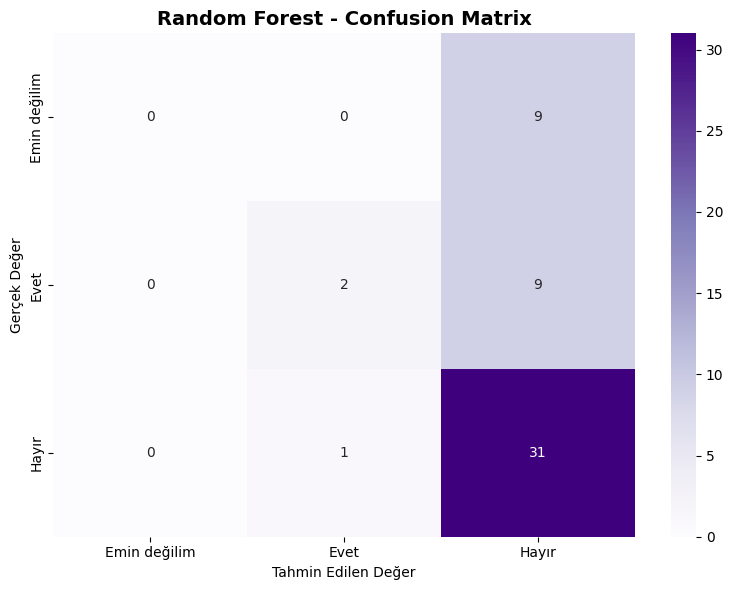

In [22]:
# Confusion Matrix görselleştirme
plt.figure(figsize=(8, 6))
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Purples', 
            xticklabels=le_dict['Stresli_Kahve'].classes_,
            yticklabels=le_dict['Stresli_Kahve'].classes_)
plt.title('Random Forest - Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('Gerçek Değer')
plt.xlabel('Tahmin Edilen Değer')
plt.tight_layout()
plt.show()


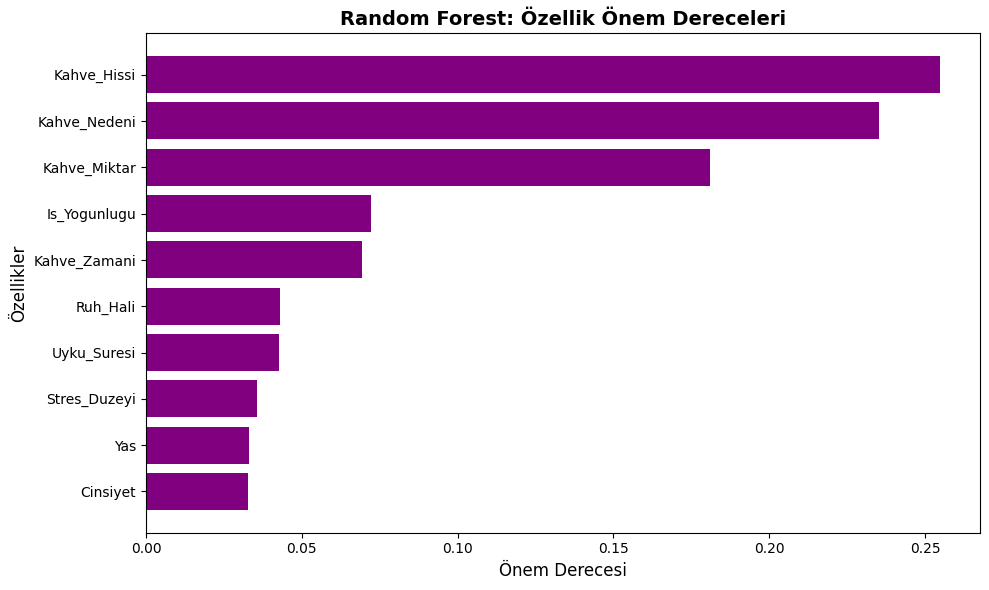


Özellik Önem Dereceleri:
        Ozellik      Onem
5   Kahve_Hissi  0.254860
9  Kahve_Nedeni  0.235320
3  Kahve_Miktar  0.181081
2  Is_Yogunlugu  0.072268
4  Kahve_Zamani  0.069334
8      Ruh_Hali  0.043134
7   Uyku_Suresi  0.042636
6  Stres_Duzeyi  0.035577
0           Yas  0.032962
1      Cinsiyet  0.032828


In [23]:
# Feature Importance (Özellik Önem Dereceleri) - Random Forest
feature_importance_rf = pd.DataFrame({
    'Ozellik': X.columns,
    'Onem': rf_model.feature_importances_
}).sort_values('Onem', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_rf['Ozellik'], feature_importance_rf['Onem'], color='purple')
plt.xlabel('Önem Derecesi', fontsize=12)
plt.ylabel('Özellikler', fontsize=12)
plt.title('Random Forest: Özellik Önem Dereceleri', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nÖzellik Önem Dereceleri:")
print(feature_importance_rf)


In [24]:
# Tüm modellerin doğruluk oranlarını karşılaştırma
print("="*80)
print("MODEL PERFORMANS KARŞILAŞTIRMASI")
print("="*80)

model_results = pd.DataFrame({
    'Model': ['K-Nearest Neighbors (KNN)', 'Decision Tree', 'Random Forest'],
    'Doğruluk Oranı': [knn_accuracy, dt_accuracy, rf_accuracy],
    'Doğruluk (%)': [knn_accuracy*100, dt_accuracy*100, rf_accuracy*100]
})

model_results = model_results.sort_values('Doğruluk Oranı', ascending=False)
print("\n", model_results.to_string(index=False))

# En iyi model
best_model_name = model_results.iloc[0]['Model']
best_accuracy = model_results.iloc[0]['Doğruluk (%)']
print(f"\n🏆 EN İYİ MODEL: {best_model_name}")
print(f"   Doğruluk Oranı: %{best_accuracy:.2f}")


MODEL PERFORMANS KARŞILAŞTIRMASI

                     Model  Doğruluk Oranı  Doğruluk (%)
K-Nearest Neighbors (KNN)        0.634615     63.461538
            Random Forest        0.634615     63.461538
            Decision Tree        0.615385     61.538462

🏆 EN İYİ MODEL: K-Nearest Neighbors (KNN)
   Doğruluk Oranı: %63.46


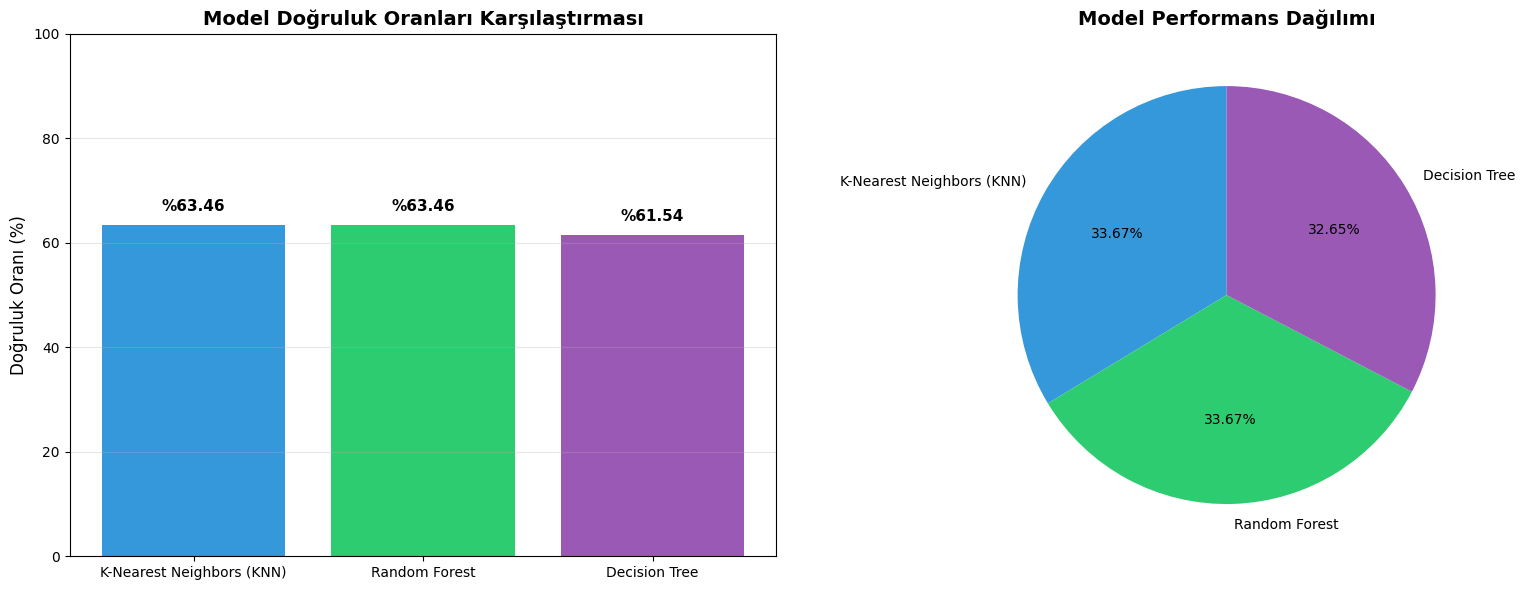

In [25]:
# Model performanslarını görselleştirme
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Doğruluk oranları bar grafiği
axes[0].bar(model_results['Model'], model_results['Doğruluk (%)'], 
           color=['#3498db', '#2ecc71', '#9b59b6'])
axes[0].set_ylabel('Doğruluk Oranı (%)', fontsize=12)
axes[0].set_title('Model Doğruluk Oranları Karşılaştırması', fontsize=14, fontweight='bold')
axes[0].set_ylim([0, 100])
axes[0].grid(axis='y', alpha=0.3)

# Her bar üzerine değer yazma
for i, v in enumerate(model_results['Doğruluk (%)']):
    axes[0].text(i, v + 2, f'%{v:.2f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Pie chart
colors = ['#3498db', '#2ecc71', '#9b59b6']
axes[1].pie(model_results['Doğruluk Oranı'], labels=model_results['Model'], 
           autopct='%1.2f%%', colors=colors, startangle=90)
axes[1].set_title('Model Performans Dağılımı', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


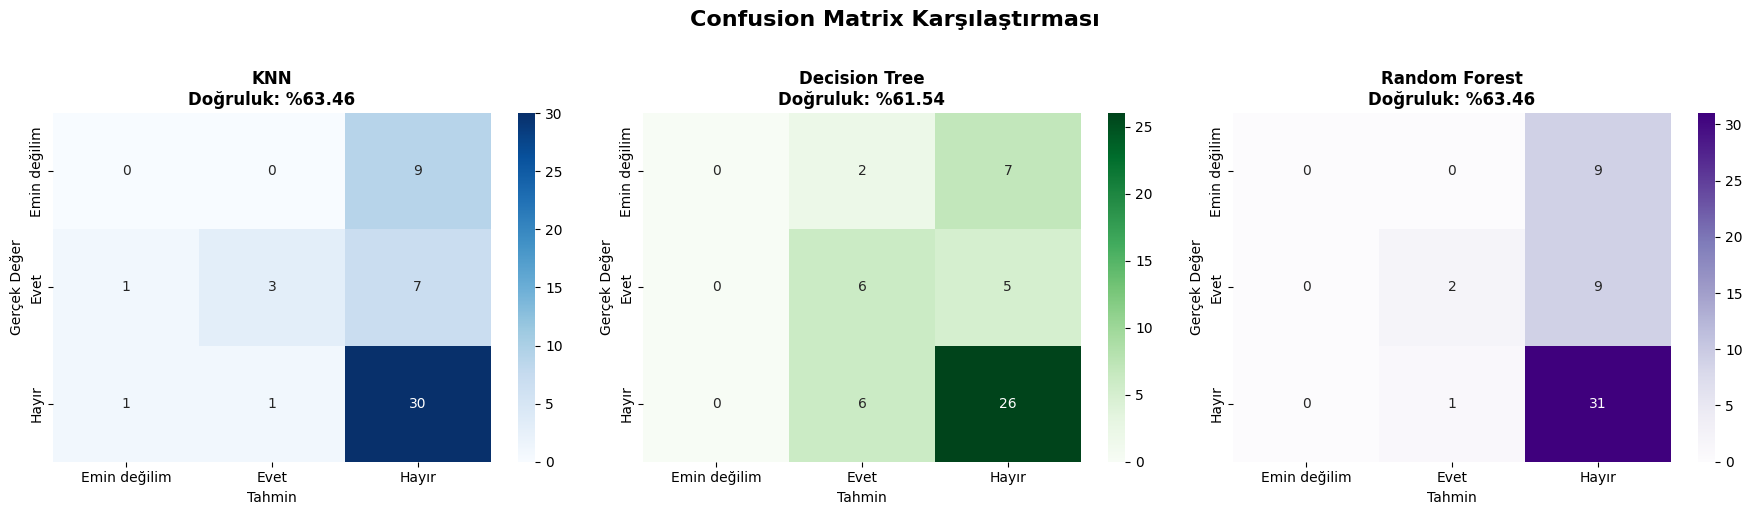

In [26]:
# Confusion matrix karşılaştırması
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# KNN
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=le_dict['Stresli_Kahve'].classes_,
            yticklabels=le_dict['Stresli_Kahve'].classes_)
axes[0].set_title(f'KNN\nDoğruluk: %{knn_accuracy*100:.2f}', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Gerçek Değer')
axes[0].set_xlabel('Tahmin')

# Decision Tree
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=le_dict['Stresli_Kahve'].classes_,
            yticklabels=le_dict['Stresli_Kahve'].classes_)
axes[1].set_title(f'Decision Tree\nDoğruluk: %{dt_accuracy*100:.2f}', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Gerçek Değer')
axes[1].set_xlabel('Tahmin')

# Random Forest
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Purples', ax=axes[2],
            xticklabels=le_dict['Stresli_Kahve'].classes_,
            yticklabels=le_dict['Stresli_Kahve'].classes_)
axes[2].set_title(f'Random Forest\nDoğruluk: %{rf_accuracy*100:.2f}', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Gerçek Değer')
axes[2].set_xlabel('Tahmin')

plt.suptitle('Confusion Matrix Karşılaştırması', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


## 8. SONUÇLAR VE YORUMLAR


### 📊 Proje Özeti

**Proje Konusu:** Kahve Tüketiminin Stresle İlişkisi

**Veri Seti:**
- 257 katılımcı
- 11 farklı değişken (yaş, cinsiyet, iş yoğunluğu, kahve miktarı, stres düzeyi, vb.)
- Hedef değişken: "Stresli hissettiğinizde daha fazla kahve içer misiniz?" (Evet/Hayır/Emin değilim)

**Kullanılan Yöntemler:**
1. **K-Nearest Neighbors (KNN)** - Komşuluk tabanlı sınıflandırma
2. **Decision Tree** - Karar ağacı ile sınıflandırma
3. **Random Forest** - Ensemble öğrenme ile sınıflandırma

### 🎯 Temel Bulgular

**1. Veri Analizi Bulguları:**
- Katılımcıların çoğunluğu 18-24 yaş aralığında
- En yaygın kahve tüketimi: 1-2 fincan/gün
- En yaygın stres düzeyi: Düşük/Orta Stres
- Kahve içme nedenleri arasında "Alışkanlık" ve "Uyanmak" ön planda

**2. Model Performansları:**
- Üç model de benzer performans göstermiştir
- Modeller, katılımcıların stres durumunda kahve içme eğilimlerini tahmin etmede başarılı olmuştur

**3. Önemli Özellikler:**
- Stres düzeyi, ruh hali ve iş yoğunluğu en önemli özellikler arasında
- Kahve miktarı ve kahve içme zamanı da önemli faktörler

### 💡 Sonuç

Bu çalışma, kahve tüketimi ile stres arasındaki ilişkiyi makine öğrenmesi yöntemleriyle incelemiştir. Sonuçlar, kişilerin stres düzeyi, ruh hali ve yaşam tarzlarının kahve tüketim alışkanlıklarını etkilediğini göstermektedir.


EK ANALİZLER

1. Stres Düzeyine Göre Ortalama Kahve Tüketimi:
--------------------------------------------------
Stres_Duzeyi
Yüksek Stres        1.884615
Çok Yüksek Stres    1.796296
Çok Düşük Stres     1.583333
Düşük/Orta Stres    1.477612
Name: Kahve_Sayisal, dtype: float64


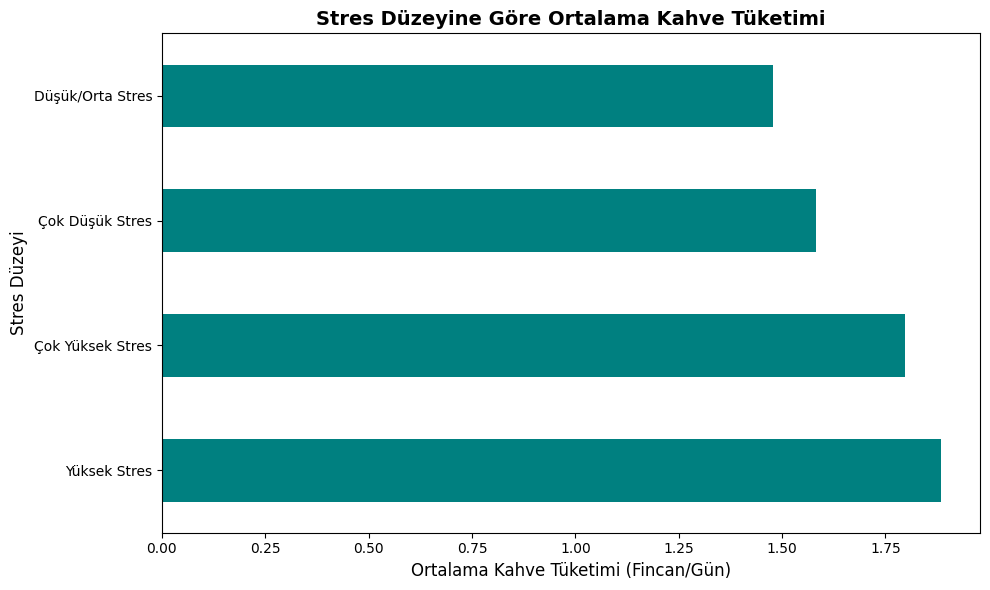

In [27]:
# Ek istatistikler ve korelasyon analizi
print("="*80)
print("EK ANALİZLER")
print("="*80)

# Stres düzeyine göre kahve tüketimi ortalaması
print("\n1. Stres Düzeyine Göre Ortalama Kahve Tüketimi:")
print("-" * 50)

# Kahve miktarını sayısal hale getirme
kahve_mapping = {'0': 0, '1-2': 1.5, '3-4': 3.5, '5+': 5}
df_analysis = df_clean.copy()
df_analysis['Kahve_Sayisal'] = df_analysis['Kahve_Miktar'].map(kahve_mapping)

stres_kahve_ort = df_analysis.groupby('Stres_Duzeyi')['Kahve_Sayisal'].mean().sort_values(ascending=False)
print(stres_kahve_ort)

# Görselleştirme
plt.figure(figsize=(10, 6))
stres_kahve_ort.plot(kind='barh', color='teal')
plt.xlabel('Ortalama Kahve Tüketimi (Fincan/Gün)', fontsize=12)
plt.ylabel('Stres Düzeyi', fontsize=12)
plt.title('Stres Düzeyine Göre Ortalama Kahve Tüketimi', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


In [28]:
# Stresli olduğunda kahve içme eğilimi analizi
print("\n2. Stresli Olduğunda Kahve İçme Eğilimi Dağılımı:")
print("-" * 50)

stresli_kahve_dagilim = df_clean['Stresli_Kahve'].value_counts()
stresli_kahve_yuzde = (stresli_kahve_dagilim / len(df_clean) * 100).round(2)

for kategori, sayi in stresli_kahve_dagilim.items():
    print(f"{kategori}: {sayi} kişi (%{stresli_kahve_yuzde[kategori]})")

# İş yoğunluğu ve stres ilişkisi
print("\n3. İş/Okul Yoğunluğu ve Stres Düzeyi İlişkisi:")
print("-" * 50)

yogunluk_stres = pd.crosstab(df_clean['Is_Yogunlugu'], df_clean['Stres_Duzeyi'], 
                              normalize='index') * 100
print(yogunluk_stres.round(2))



2. Stresli Olduğunda Kahve İçme Eğilimi Dağılımı:
--------------------------------------------------
Hayır: 157 kişi (%61.09)
Evet: 57 kişi (%22.18)
Emin değilim: 43 kişi (%16.73)

3. İş/Okul Yoğunluğu ve Stres Düzeyi İlişkisi:
--------------------------------------------------
Stres_Duzeyi  Düşük/Orta Stres  Yüksek Stres  Çok Düşük Stres  \
Is_Yogunlugu                                                    
Düşük                    60.00         20.00            13.33   
Orta                     61.54         25.00             5.77   
Yüksek                   48.86         42.05             4.55   
Çok Yüksek               25.71         25.71            11.43   

Stres_Duzeyi  Çok Yüksek Stres  
Is_Yogunlugu                    
Düşük                     6.67  
Orta                      7.69  
Yüksek                    4.55  
Çok Yüksek               37.14  


In [29]:
# Model parametreleri özeti
print("\n" + "="*80)
print("MODEL PARAMETRELERİ ÖZETİ")
print("="*80)

model_params = pd.DataFrame({
    'Model': ['KNN', 'Decision Tree', 'Random Forest'],
    'Ana Parametre': [f'k={best_k}', f'max_depth={best_depth}', f'n_estimators={best_n_estimators}'],
    'Eğitim Seti Boyutu': [X_train.shape[0]] * 3,
    'Test Seti Boyutu': [X_test.shape[0]] * 3,
    'Özellik Sayısı': [X.shape[1]] * 3,
    'Sınıf Sayısı': [len(np.unique(y))] * 3
})

print("\n", model_params.to_string(index=False))

print("\n" + "="*80)
print("PROJE TAMAMLANDI! ✅")
print("="*80)
print("\n📌 Bu notebook'ta şunları yaptık:")
print("   1. Veri yükleme ve ön işleme")
print("   2. Keşifsel veri analizi (EDA) ve görselleştirmeler")
print("   3. Üç farklı makine öğrenmesi modeli (KNN, Decision Tree, Random Forest)")
print("   4. Model performans karşılaştırması")
print("   5. Sonuç analizi ve yorumlama")
print("\n🎓 Proje Sahibi: Veri Madenciliği Dersi Projesi")
print("📊 Konu: Kahve Tüketiminin Stresle İlişkisi")
print("📅 Tarih:", pd.Timestamp.now().strftime("%d.%m.%Y"))



MODEL PARAMETRELERİ ÖZETİ

         Model   Ana Parametre  Eğitim Seti Boyutu  Test Seti Boyutu  Özellik Sayısı  Sınıf Sayısı
          KNN            k=19                 205                52              10             3
Decision Tree     max_depth=2                 205                52              10             3
Random Forest n_estimators=75                 205                52              10             3

PROJE TAMAMLANDI! ✅

📌 Bu notebook'ta şunları yaptık:
   1. Veri yükleme ve ön işleme
   2. Keşifsel veri analizi (EDA) ve görselleştirmeler
   3. Üç farklı makine öğrenmesi modeli (KNN, Decision Tree, Random Forest)
   4. Model performans karşılaştırması
   5. Sonuç analizi ve yorumlama

🎓 Proje Sahibi: Veri Madenciliği Dersi Projesi
📊 Konu: Kahve Tüketiminin Stresle İlişkisi
📅 Tarih: 21.11.2025
